<a href="https://colab.research.google.com/github/Joshuaiwuoha/Hamoye_-projects/blob/main/Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [176]:
data = pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt', delimiter = ';',low_memory = False)

In [177]:
data.replace('?', np.nan, inplace = True)

In [178]:

# Filter values that are not integers or floats
for each in (data.columns.tolist()[2:]):
  non_numeric_values = data.loc[data[each].apply(lambda x: isinstance(x, (int, float))), each]
  print(non_numeric_values.unique())


[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[17. 16. 18.  9.  0.  5. 19. 10. 20.  8.  4.  2.  3. 11. 13.  6. 15. nan
 12.  1. 14.  7. 23. 25. 26. 28. 27. 21. 22. 29. 24. 30. 31.]


In [179]:
for each in (data.columns.tolist()[2:]):
  data[each] = pd.to_numeric(data[each], errors = 'coerce' )

In [180]:
#Forward-fill missing values
data.ffill(inplace=True)

In [181]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [182]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('DateTime', inplace=True)

In [183]:
hourly_data = data.resample('H').sum()


<ipython-input-183-7b2dfc1f81f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data = data.resample('H').sum()


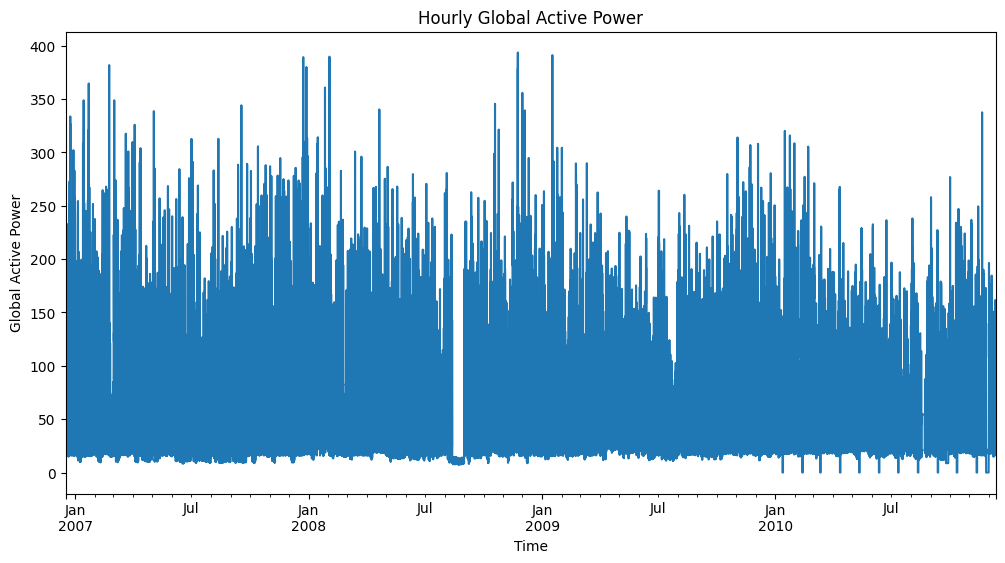

In [184]:
# # Plot the hourly global_active_power over time
hourly_data['Global_active_power'].plot(figsize=(12, 6), title='Hourly Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.show()

In [191]:
cor = data.global_active_power.corr(data.voltage)
print(round(cor, 3))


-0.396


In [192]:

cor = data.global_intensity.corr(data.voltage)
print(round(cor,3))

-0.407


In [193]:
data.columns = data.columns.str.lower().to_list()

In [194]:
daily_data = data.resample('D').sum()

<ipython-input-194-59bded35c1d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.resample('D').sum()


In [195]:
daily_data.head()

,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
DateTime,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [196]:
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# Sort the DataFrame by the 'dt' column

daily_data.reset_index(inplace = True)
dope = daily_data.sort_values(by='DateTime')



# Create a train-test split
test_size = 300
train_df = dope[:-test_size]
test_df = dope[-test_size:]


# Prepare the DataFrame for Prophet
prophet_train_df = train_df[['DateTime', 'global_active_power']].rename(columns={'DateTime': 'ds', 'global_active_power': 'y'})



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7a_dbcm/wm__81ac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7a_dbcm/iao8nz0o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42186', 'data', 'file=/tmp/tmpo7a_dbcm/wm__81ac.json', 'init=/tmp/tmpo7a_dbcm/iao8nz0o.json', 'output', 'file=/tmp/tmpo7a_dbcm/prophet_modelawbo0dux/prophet_model-20231205222119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:21:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:21:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


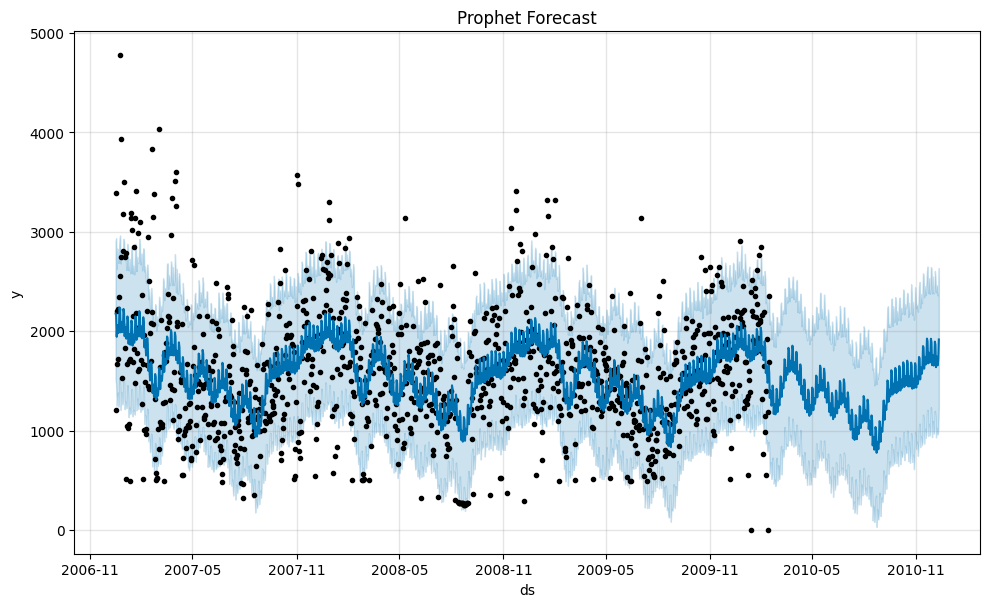

In [197]:
# Train the Prophet model
model = Prophet()
model.fit(prophet_train_df)

# # Create a DataFrame for future dates
future_dates = model.make_future_dataframe(periods=test_size, freq='D')



# Make predictions on the future dates
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()


In [ ]:
df_merge = pd.merge(test_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],left_on='DateTime', right_on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','global_active_power']]
df_merge.head()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
import numpy as np
# calculate MAE between observed and predicted values
y_true = df_merge['global_active_power'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)
# Calculate RMSE
rmse_01 = np.sqrt(mean_squared_error(y_true, y_pred))

# Print the results
print(f'MAE: {mae_01:.3f}')
print(f'MAPE: {mape_01}')
print(f'RMSE: {rmse_01}')

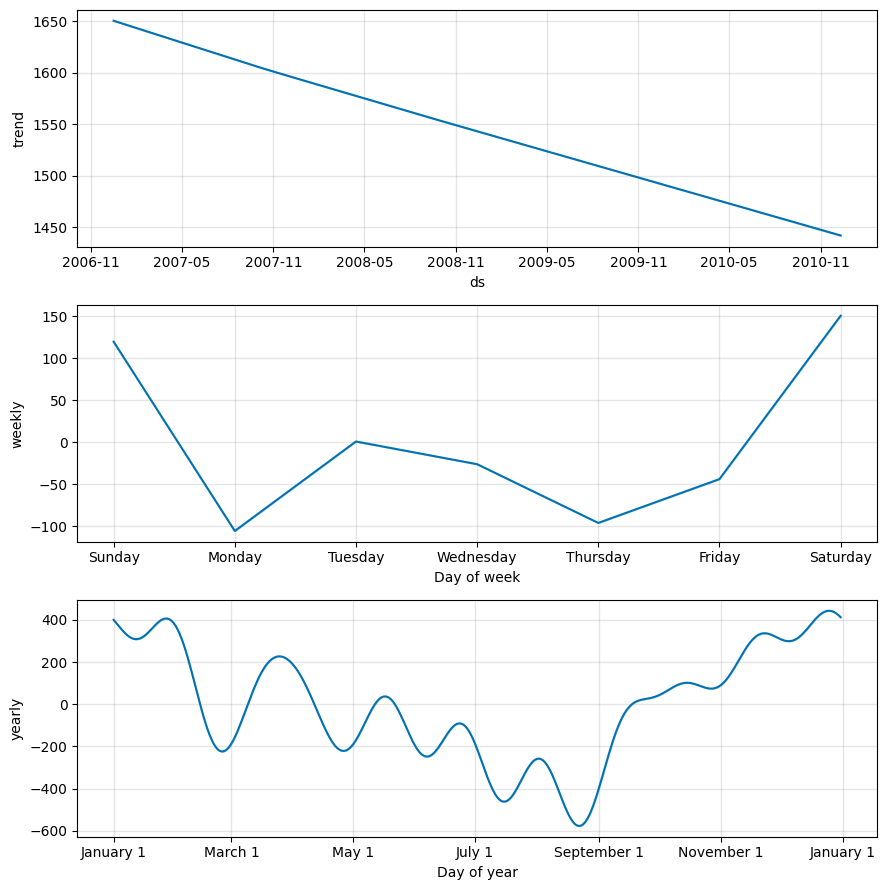

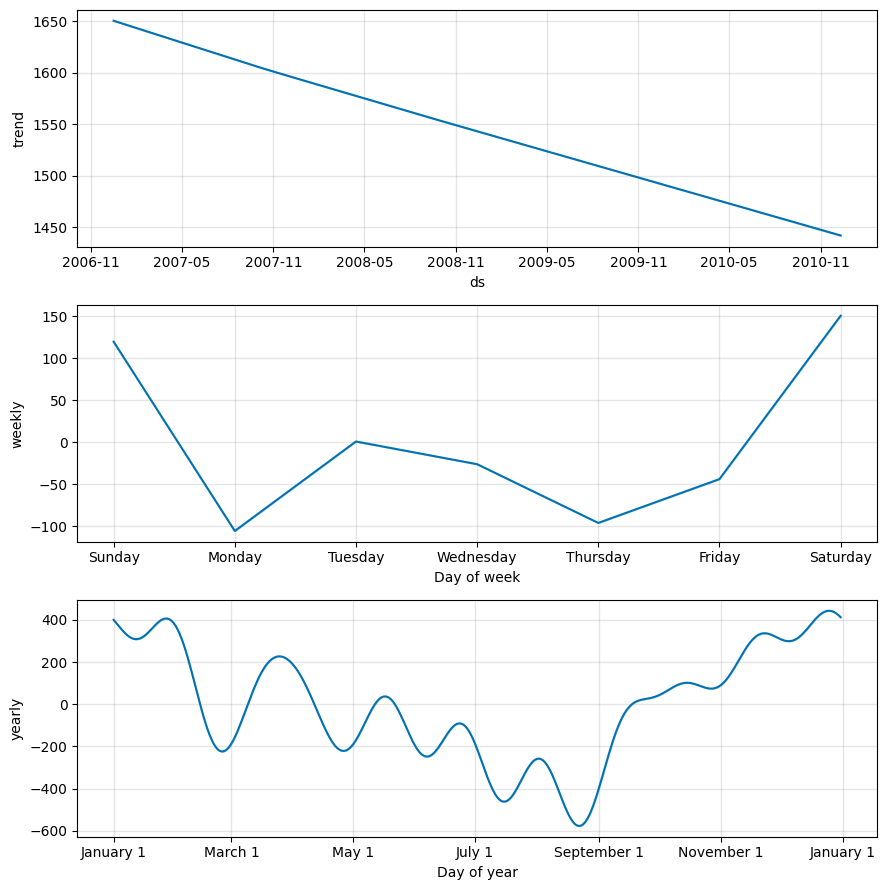

In [95]:
model.plot_components(forecast)

# multivariate

In [198]:
test_size = 300
train_df = dope[:-test_size]
test_df = dope[-test_size:]

In [199]:
# Prepare the DataFrame for Prophet with additional regressors
prophet_train_df_2 = train_df[['DateTime', 'global_active_power', 'global_reactive_power',
                             'voltage', 'global_intensity', 'sub_metering_1',
                             'sub_metering_2', 'sub_metering_3']].rename(columns={'DateTime': 'ds',
                                                                             'global_active_power': 'y',
                                                                             'global_reactive_power': 'add1',
                                                                             'voltage': 'add2',
                                                                             'global_intensity': 'add3',
                                                                             'sub_metering_1': 'add4',
                                                                             'sub_metering_2': 'add5',
                                                                             'sub_metering_3': 'add6'})

# Train the Prophet model with additional regressors
model = Prophet()
model.add_regressor('add1', standardize=False)
model.add_regressor('add2', standardize=False)
model.add_regressor('add3', standardize=False)
model.add_regressor('add4', standardize=False)
model.add_regressor('add5', standardize=False)
model.add_regressor('add6', standardize=False)

model.fit(prophet_train_df_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7a_dbcm/eiat1d14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo7a_dbcm/53pdq64c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33307', 'data', 'file=/tmp/tmpo7a_dbcm/eiat1d14.json', 'init=/tmp/tmpo7a_dbcm/53pdq64c.json', 'output', 'file=/tmp/tmpo7a_dbcm/prophet_modelnp8zg2mx/prophet_model-20231205222201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:22:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:22:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
22:22:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

In [134]:
# Create a DataFrame for future dates with the same regressor columns
# # Create a DataFrame for future dates
future_dates = model.make_future_dataframe(periods=test_size, freq='D')



In [135]:
future_dates = future_dates[-300:]

In [127]:
future_dates

,ds
1157,2010-02-15
1158,2010-02-16
1159,2010-02-17
1160,2010-02-18
1161,2010-02-19
...,...
1452,2010-12-07
1453,2010-12-08
1454,2010-12-09
1455,2010-12-10


In [136]:
for reg in ['global_reactive_power', 'voltage', 'global_intensity', 'sub_metering_1', 'sub_metering_2', 'sub_metering_3']:
    future_dates[reg] = test_df[reg].values


In [137]:
future_dates.rename(columns={'global_reactive_power':
                             'add1','voltage': 'add2','global_intensity': 'add3','sub_metering_1': 'add4',
                             'sub_metering_2': 'add5','sub_metering_3': 'add6'}, inplace = True)

In [138]:

# Make predictions on the future dates
forecast = model.predict(future_dates)


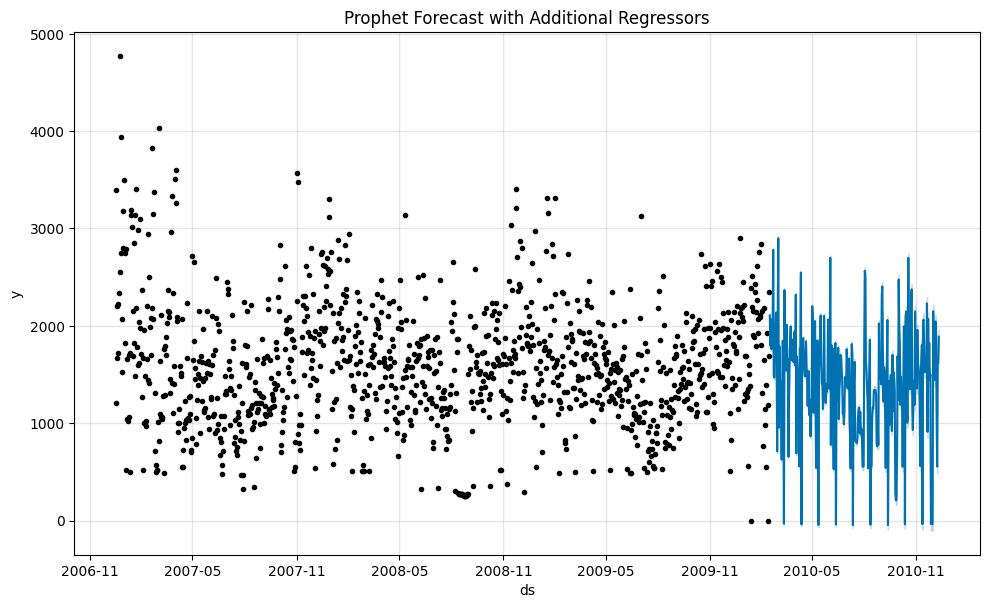

In [139]:

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast with Additional Regressors')
plt.show()


In [140]:
df_merge = pd.merge(test_df, forecast[['ds','yhat_lower','yhat_upper','yhat']],left_on='DateTime', right_on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','global_active_power']]
df_merge.head(20)

,ds,yhat_lower,yhat_upper,yhat,global_active_power
0,2010-02-15,2087.218416,2127.458014,2107.180517,2097.132
1,2010-02-16,1777.024899,1818.308735,1797.741143,1797.756
2,2010-02-17,2044.244163,2085.413277,2064.625921,2054.560
3,2010-02-18,1741.260566,1780.382375,1760.296756,1761.156
4,2010-02-19,1950.473953,1989.796340,1970.768507,1953.572
5,2010-02-20,1977.048161,2016.824772,1997.491744,1983.728
6,2010-02-21,2759.951181,2799.259348,2780.400667,2740.314
7,2010-02-22,1472.236267,1512.237880,1492.620820,1474.036
8,2010-02-23,1449.060770,1487.583930,1468.808130,1461.280
9,2010-02-24,1900.799642,1940.629350,1921.581487,1914.278


In [141]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
import numpy as np
# calculate MAE between observed and predicted values
y_true = df_merge['global_active_power'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)
# Calculate RMSE
rmse_01 = np.sqrt(mean_squared_error(y_true, y_pred))

# Print the results
print(f'MAE: {mae_01:.3f}')
print(f'MAPE: {mape_01}')
print(f'RMSE: {rmse_01}')

MAE: 14.544
MAPE: 7660033305385060.0
RMSE: 18.659095950486176


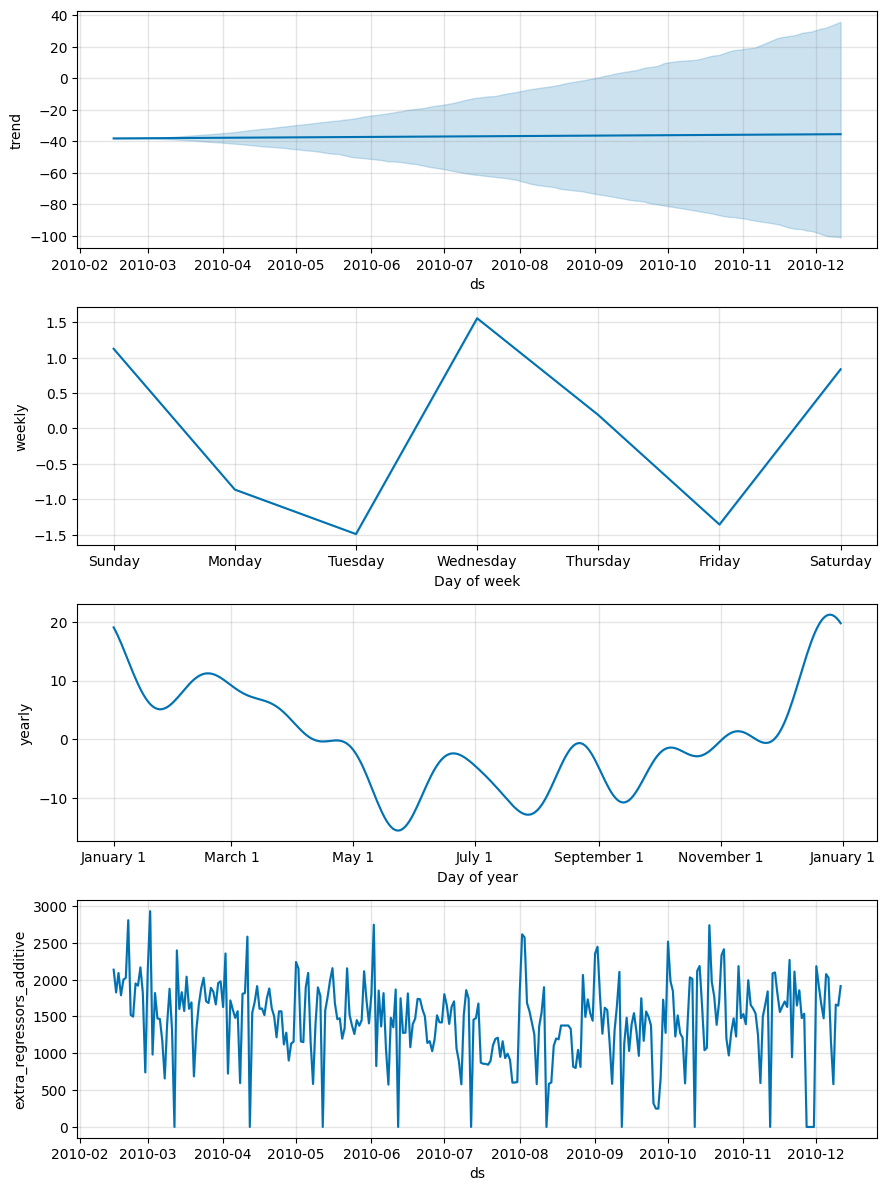

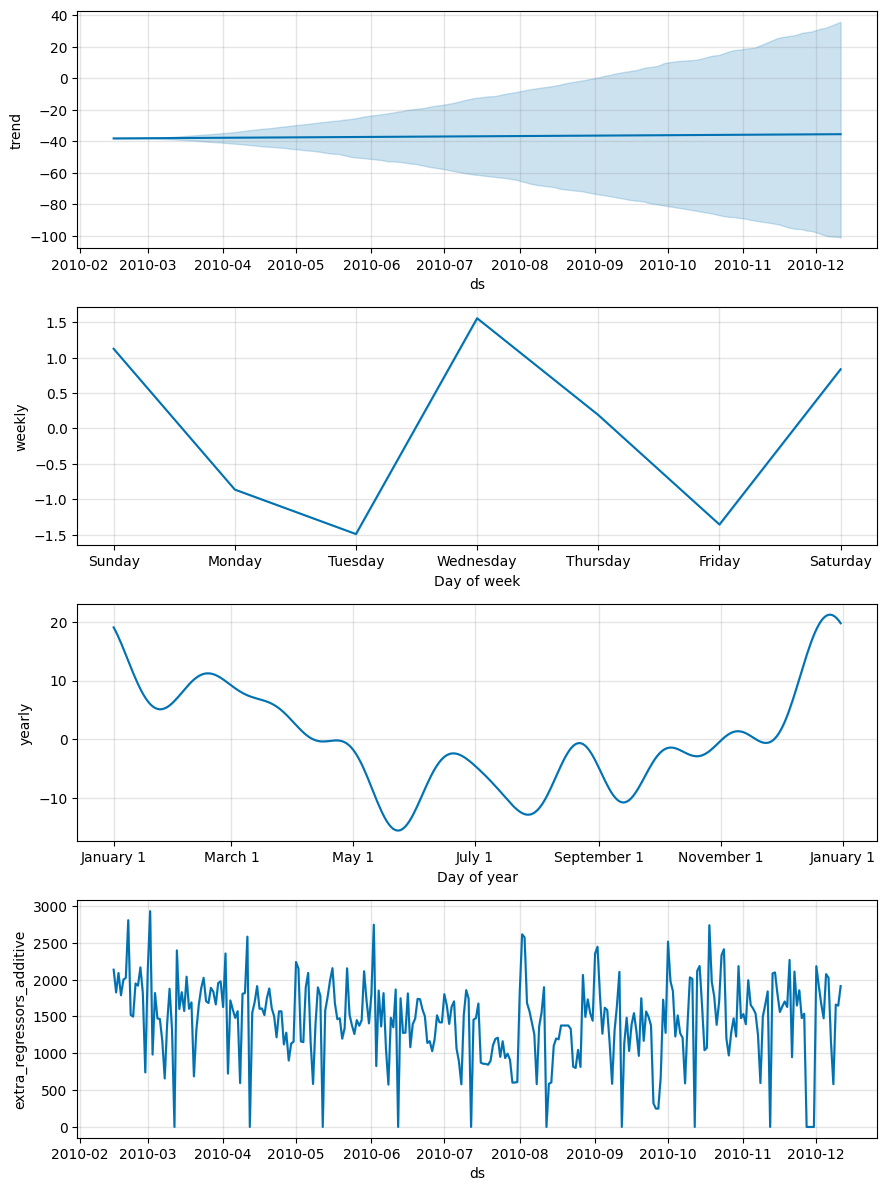

In [142]:
model.plot_components(forecast)